# **Introduction**

With the advent of COVID-19, controls were put in place to reduce strain on healthcare systems to bide time for vaccination development in the hopes that vaccination would reduce hospitalizations related to COVID-19. Vaccinations campaigns have since been in full swing. However, variant strains of COVID-19 have emerged, bringing uncertainty to the efficacy of vaccinations whose efficacy was based on studies with the alpha strain. If vaccinations retain some degree of efficacy in reducing hospitalizations  related to COVID-19 among strains, they may yet reduce strain on healthcare systems. However, additional "booster" doses have emerged as a topic of consideration in hopes to increase efficacy among strains. The question is whether an increase in vaccines administered is associated with a reduction in hospitalization occurrences attributed to COVID-19, thereby potentially contributing to a reduction in the probability of the medical system becoming overwhelmed.

----

# **Background**

According to the Center for Disease Control (CDC), 60.8% of the United States (U.S.) population has been fully vaccinated (201,975,235 people) and 72% has received at least 1 dose (239,008,166 people) as of December 12th, 2021. The emergence of various SARS-CoV-2 variants highlights the importance of vaccinations and increasing vaccination efforts in hopes of providing sufficient protection against COVID-19 and possible upcoming waves.

Centers for Disease Control and Prevention. (2021). COVID-19 vaccinations in the United States. Centers for Disease Control and Prevention. https://covid.cdc.gov/covid-data-tracker/#vaccinations_vacc-total-admin-rate-total


Among the plethora of SARS-CoV-2 variants identified, the most widely know Variants of Concern include B.1.1.7 (Alpha), B.1.351 (Beta), and B.1.617.2 (Delta). These variants are associated with increased viral transmission [1], hospitalizations, and severity of disease, with the Delta variant being declared the most transmissible [2]. However, on November 11th, 2021 the variant B.1.1.529 (Omicron) was detected in samples from Africa. On November 30, 2021, the United States designated Omicron as a Variant of Concern. The following day, the first confirmed U.S. case of Omicron was identified. At the time of writing, a statement from the Center for Disease Control (CDC) with details on the Omicron variant remains to be seen. It remains unclear the degree of concern the Omicron variant presents in relation to the current predominant (Delta) variant in the United States.

As of December 12th, 2021, the Center for Disease Control (CDC) does not yet have a disposition on the Omicron variant with regard to transmissibility, the severity of illness it causes, or how well available vaccines and medications work against it.

However, the Center for Disease Control (CDC) has stated:

>"Vaccines remain the best public health measure to protect people from COVID-19, slow transmission, and reduce the likelihood of new variants emerging. COVID-19 vaccines are highly effective at preventing severe illness, hospitalizations, and death. Scientists are currently investigating Omicron, including how protected fully vaccinated people will be against infection, hospitalization, and death."

Centers for Disease Control and Prevention. (2021). COVID-19 Omicron Variant. Centers for Disease Control and Prevention. https://www.cdc.gov/coronavirus/2019-ncov/variants/omicron-variant.html

----

# **Methods**

> **Hypothesis: An increase in vaccines administered is associated with a reduction in  hospitalization occurrences attributed to COVID-19**

## **Analysis Plan**

**1. Remove aggregated facility report entries with suppressed sums/averages that were replaced with "-999,999" from any part of the analysis that utilizes these fields.**

**2. Exclude influenza specific fields from the data and exclude influenza from any part of the analysis, as Health and Human Services (HHS) guidance has marked these fields as optional, resulting in varied coverage.**

**3. Narrow focus to fields regarding COVID-19 hospitalization/ED and vaccination:**

>- previous_week_personnel_covid_vaccinated_doses_administered_7_day
> > The number reported of COVID-19 vaccination doses administered in the previous week regardless of whether it is a first or second dose in a series.
>- previous_week_patients_covid_vaccinated_doses_one_7_day
> > The number of patients who received the first dose of a COVID-19 vaccine that is administered in a multi-dose series.
>- previous_week_patients_covid_vaccinated_doses_all_7_day
> > The number of patients who received the final dose in a COVID-19 vaccination series.
>- total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
> > Sum of reports of patients currently hospitalized in an adult inpatient bed who have laboratory-confirmed or suspected COVID19. Including those in observation beds reported during the 7-day period.
>- total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
> > Sum of reports of patients currently hospitalized in a pediatric inpatient bed, including NICU, PICU, newborn, and nursery, who are suspected or laboratory-confirmed-positive for COVID-19. Including those in observation beds reported in the 7-day period.
>- total_adult_patients_hospitalized_confirmed_covid_7_day_sum
> > Sum of reports of patients currently hospitalized in an adult inpatient bed who have laboratory-confirmed COVID-19. Including those in observation beds. Including patients who have both laboratory-confirmed COVID-19 and laboratory confirmed influenza in this field during the 7-day period.
>- total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum
> > Sum of reports of patients currently hospitalized in a pediatric inpatient bed, including NICU, PICU, newborn, and nursery, who have laboratory-confirmed COVID-19. Including those in observation beds. Including patients who have both laboratory-confirmed COVID-19 and laboratory confirmed influenza in this field reported in the 7-day period.
>- previous_day_covid_ed_visits_7_day_sum
> > Sum of total number of ED visits who were seen on the previous calendar day who had a visit related to COVID-19 (meets suspected or confirmed definition or presents for COVID diagnostic testing – do not count patients who present for pre-procedure screening) reported in 7-day period.

**4. Compare the significance of adult/pediatric COVID-19 hospitalization fields:**

>- total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
>- total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
>- total_adult_patients_hospitalized_confirmed_covid_7_day_sum
>- total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum

**5. Focus on only adult/pediatric COVID-19 hospitalization fields if one is significantly larger than the other.**

**6. Visualize the fields, aggregated by collection week.**

**7. Add COVID-19 vaccine related timeframes to the visualization to provide context.**

**8. Visualize the mean values among fields in the categories: COVID-19 Hospital Strain & Vaccination Quantity.**

**9. Statistically analyze COVID-19 Hospital Strain & Vaccination Quantity fields for possible associations with fields in the converse category.**


----

**Imports and Setup**

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

pd.set_option('display.max_rows', 16)

LARGE_FIGSIZE = (16, 9)
MEDIUM_FIGSIZE = (12, 8)

In [2]:
# Dataset:
# "COVID-19 Reported Patient Impact and Hospital Capacity by Facility"
# <https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/uqq2-txqb>
cov_dataset_name = 'COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility_--_RAW_12_Dec_2021.csv'

----

## Step 1
> Remove aggregated facility report entries with suppressed sums/averages that were replaced by Health and Human Services (HHS) with "-999,999" from any part of the analysis that utilizes these fields.

In [3]:
raw_cov_df = pd.read_csv(cov_dataset_name,
                         parse_dates=True,
                         na_values=-999999,
                         index_col='collection_week')

In [4]:
(raw_cov_df.describe().loc['min']==-999999).sum()

0

----

## Step 2
> Remove influenza specific fields from the data and exclude influenza from any part of the analysis, as Health and Human Services (HHS) guidance has marked these fields as optional, resulting in varied coverage.

In [5]:
influenza_cols = raw_cov_df.columns[raw_cov_df.columns.str.contains('influenza')].values
influenza_cols

array(['total_patients_hospitalized_confirmed_influenza_7_day_avg',
       'icu_patients_confirmed_influenza_7_day_avg',
       'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg',
       'total_patients_hospitalized_confirmed_influenza_7_day_sum',
       'icu_patients_confirmed_influenza_7_day_sum',
       'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum',
       'total_patients_hospitalized_confirmed_influenza_7_day_coverage',
       'icu_patients_confirmed_influenza_7_day_coverage',
       'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_coverage',
       'previous_day_admission_influenza_confirmed_7_day_sum'],
      dtype=object)

In [6]:
raw_cov_df.columns.str.contains('influenza').sum()

10

In [7]:
raw_cov_df = raw_cov_df.drop(columns=influenza_cols)
raw_cov_df.columns.str.contains('influenza').sum()

0

----

## Step 3
> Narrow focus to fields regarding hospitalization/ED and vaccination: 
>
>- total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
>- total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
>- total_adult_patients_hospitalized_confirmed_covid_7_day_sum
>- total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum
>- previous_week_patients_covid_vaccinated_doses_one_7_day
>- previous_week_patients_covid_vaccinated_doses_all_7_day
>- previous_week_personnel_covid_vaccinated_doses_administered_7_day
>- previous_day_covid_ED_visits_7_day_sum

In [97]:
cov = raw_cov_df

# focus on hospitalization/ED and vaccination fields
hosp_ed_one_all_clean_df = \
    pd.DataFrame({'adult_hospital_conf_susp_cov' : \
                  cov['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'],
                  'pediatric_hospital_conf_susp_cov' : \
                  cov['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'], 
                  'adult_hospital_conf_covid' : \
                  cov['total_adult_patients_hospitalized_confirmed_covid_7_day_sum'],
                  'pediatric_hospital_conf_covid' : \
                  cov['total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum'], 
                  'personnel_doses_admin' : \
                  cov['previous_week_personnel_covid_vaccinated_doses_administered_7_day'],
                  'patient_one_dose_admin' : \
                  cov['previous_week_patients_covid_vaccinated_doses_one_7_day'],
                  'patient_all_dose_admin' : \
                  cov['previous_week_patients_covid_vaccinated_doses_all_7_day'],
                  'ED_visit_covid' : \
                  cov['previous_day_covid_ED_visits_7_day_sum']
                 })

del cov

----

## Step 4
Compare the significance of adult/pediatric hospitalization fields:

>- total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
>- total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
>- total_adult_patients_hospitalized_confirmed_covid_7_day_sum
>- total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum

In [100]:
ped_hosp_conf_sum = hosp_ed_one_all_clean_df.pediatric_hospital_conf_covid.sum()
ped_hosp_conf_susp_sum = hosp_ed_one_all_clean_df.pediatric_hospital_conf_susp_cov.sum()
adult_hosp_conf_sum = hosp_ed_one_all_clean_df.adult_hospital_conf_covid.sum()
adult_hosp_conf_susp_sum = hosp_ed_one_all_clean_df.adult_hospital_conf_susp_cov.sum()
tot_conf = ped_hosp_conf_sum + adult_hosp_conf_sum
tot_conf_susp = ped_hosp_conf_susp_sum + adult_hosp_conf_susp_sum
ped_conf_percent = '%.0f' % (ped_hosp_conf_sum / tot_conf * 100)
ped_conf_susp_percent = '%.0f' % (ped_hosp_conf_susp_sum / tot_conf_susp * 100)
adult_conf_percent = '%.0f' % (adult_hosp_conf_sum / tot_conf * 100)
adult_conf_susp_percent = '%.0f' % (adult_hosp_conf_susp_sum / tot_conf_susp * 100)

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>AGE</b>',
            '<b>Hospitalized Confirmed COVID-19</b>',
            '<b>Hospitalized Confirmed/Suspected COVID-19</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Pediatric', 'Adult', '<b>TOTAL</b>'],
      [f'{ped_hosp_conf_sum} ({ped_conf_percent}%)', f'{adult_hosp_conf_sum} ({adult_conf_percent}%)', tot_conf],
      [f'{ped_hosp_conf_susp_sum} ({ped_conf_susp_percent}%)', f'{adult_hosp_conf_susp_sum} ({adult_conf_susp_percent}%)', tot_conf_susp]],
    line_color='darkslategray',
    #  alternate row color
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor]],
    align=['left', 'left'],
    font=dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

### Figure 1. 
### Pediatric cases only constitute 1% of confirmed and 2% of confirmed/suspected COVID-19 Hospitalizations; whereas, Adult cases constitute 99% of confirmed and 98% of confirmed/suspected COVID-19 Hospitalizations (United States).

----

## Step 5

> Focus on only adult/pediatric hospitalization fields if one is significantly larger than the other 

In [49]:
# remove pediatric fields
hosp_ed_one_all_clean_df = hosp_ed_one_all_clean_df.drop(columns=['pediatric_hospital_conf_covid',
                                                                  'pediatric_hospital_conf_susp_cov'])
# change 'adult_hospital' prefix to 'hospitalized'
hosp_ed_one_all_clean_df.columns = hosp_ed_one_all_clean_df.columns.str.replace('adult_hospital', 
                                                                                'hospitalized')

In [101]:
# check date index for sort order
hosp_ed_one_all_clean_df.index

DatetimeIndex(['2021-11-26', '2021-11-26', '2021-11-26', '2021-11-26',
               '2021-11-26', '2021-11-26', '2021-11-26', '2021-11-26',
               '2021-11-26', '2021-11-26',
               ...
               '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31',
               '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31',
               '2020-07-31', '2020-07-31'],
              dtype='datetime64[ns]', name='collection_week', length=349655, freq=None)

In [102]:
# sort date index to get chronological order
hosp_ed_one_all_clean_df = hosp_ed_one_all_clean_df.sort_index()
hosp_ed_one_all_clean_df.index

DatetimeIndex(['2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31',
               '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31',
               '2020-07-31', '2020-07-31',
               ...
               '2021-11-26', '2021-11-26', '2021-11-26', '2021-11-26',
               '2021-11-26', '2021-11-26', '2021-11-26', '2021-11-26',
               '2021-11-26', '2021-11-26'],
              dtype='datetime64[ns]', name='collection_week', length=349655, freq=None)

----

## Step 6
> Visualize the fields, aggregated by collection week.

In [103]:
def cov_plot(df):
    dates = df.index

    fig, ax = plt.subplots()
    
    # misc settings
    fig.set_size_inches(LARGE_FIGSIZE)
    plt.rcParams["font.family"] = "serif"
    plt.xlim(pd.to_datetime(dates[0]), 
             pd.to_datetime(dates[len(dates)-1]))

    # plot 
    df.plot(ax=ax)
    
    # set labels
    plt.title('US COVID-19 Vaccination and Hospitalization/ED Weekly Counts')
    plt.ylabel('Count')
    plt.xlabel('Date')

    # slant date
    fig.autofmt_xdate()


    plt.legend(loc='upper left')
    plt.show()

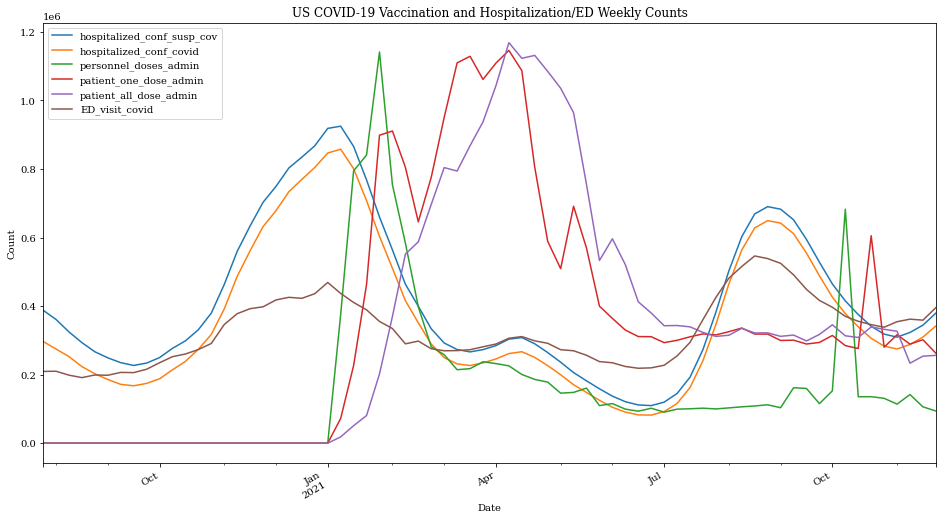

In [58]:
hosp_ed_one_all_clean_gb = hosp_ed_one_all_clean_df.groupby('collection_week')
hosp_ed_one_all_clean_sum = hosp_ed_one_all_clean_gb.sum()
cov_plot(hosp_ed_one_all_clean_sum)

### Figure 2.
### United States weekly total: adult hospitalization COVID-19 confirmed (blue) and confirmed/suspected (orange), Emergency Department visits related to COVID-19 (brown), hospital personnel vaccination doses (green), patient vaccination administrations first (red) and all (pink). 

----

## Step 7
> Add COVID-19 vaccine related timeframes to the visualization to provide context.

In [59]:
def cov_plot_1k(df, plt_title='US COVID-19 Vaccination and Hospitalization/ED Weekly Counts (per 1K)'):
    dates = df.index

    fig, ax = plt.subplots()

    # misc settings
    fig.set_size_inches(LARGE_FIGSIZE)
    plt.rcParams["font.family"] = "serif"
    plt.ylim(0, 1200)
    plt.xlim(pd.to_datetime(dates[0]), 
             pd.to_datetime(dates[len(dates)-1]))

    # plot 
    df.plot(ax=ax)

    # highlight approximate date of first vaccination dose deadline for federal employees
    plt.axvline(x=pd.to_datetime('10-22-2021'))
    # highlight approximate date of final vaccination dose deadline for federal employees
    plt.axvline(x=pd.to_datetime('11-5-2021'))
    # highlight approximate date when first vaccinations started
    plt.fill_between(dates, 1250, 0,
                     where = (dates > pd.to_datetime('25-12-2020')) & (dates <= pd.to_datetime('15-1-2021')),
                     color = '#5b9ad5',alpha=.3,zorder=2)
    # highlight approximate date when 12-15y/o vaccinations started
    plt.fill_between(dates, 1250, 0,
                     where = (dates > pd.to_datetime('10-5-2021')) & (dates <= pd.to_datetime('10-25-2021')),
                     color = '#5b9ad5',alpha=.3,zorder=2)
    # highlight apprixmiate date when 5+ y/o vaccinations started
    plt.fill_between(pd.to_datetime(dates), 1250, 0,
                     where = (dates > pd.to_datetime('11-3-2021')) & (dates <= pd.to_datetime('11-21-2021')),
                     color = '#5b9ad5',alpha=.3,zorder=2)
    # add text annotations
    plt.annotate(
        "16+ y/o vaccine approved",
        (pd.to_datetime('1-1-2021'), 1185),
        (pd.to_datetime('1-22-2021'), 1155),
        arrowprops=dict(arrowstyle = "-|>",color='#575759'),
        family='serif',color='#575759')
    plt.annotate(
        "12+ y/o vaccine approved",
        (pd.to_datetime('10-15-2021'), 1180),
        (pd.to_datetime('5-30-2021'), 1120),
        arrowprops=dict(arrowstyle = "-|>",color='#575759'),
        family='serif',color='#575759')
    plt.annotate(
        "5+ y/o vaccine approved",
        (pd.to_datetime('11-11-2021'), 1155),
        (pd.to_datetime('6-10-2021'), 1065),
        arrowprops=dict(arrowstyle = "-|>",color='#575759'),
        family='serif',color='#575759')
    plt.annotate(
        "federal mandate deadline (first dose)",
        (pd.to_datetime('10-22-2021'), 1000),
        (pd.to_datetime('5-11-2021'), 1000),
        arrowprops=dict(arrowstyle = "-|>",color='#575759'),
        family='serif',color='#575759')
    plt.annotate(
        "federal mandate deadline (final dose)",
        (pd.to_datetime('11-5-2021'), 930),
        (pd.to_datetime('5-21-2021'), 930),
        arrowprops=dict(arrowstyle = "-|>",color='#575759'),
        family='serif',color='#575759')

    # set labels
    plt.title(plt_title)
    plt.ylabel('Count per 1k')
    plt.xlabel('Date')

    # slant date
    fig.autofmt_xdate()


    plt.legend(loc='upper left')
    plt.show()

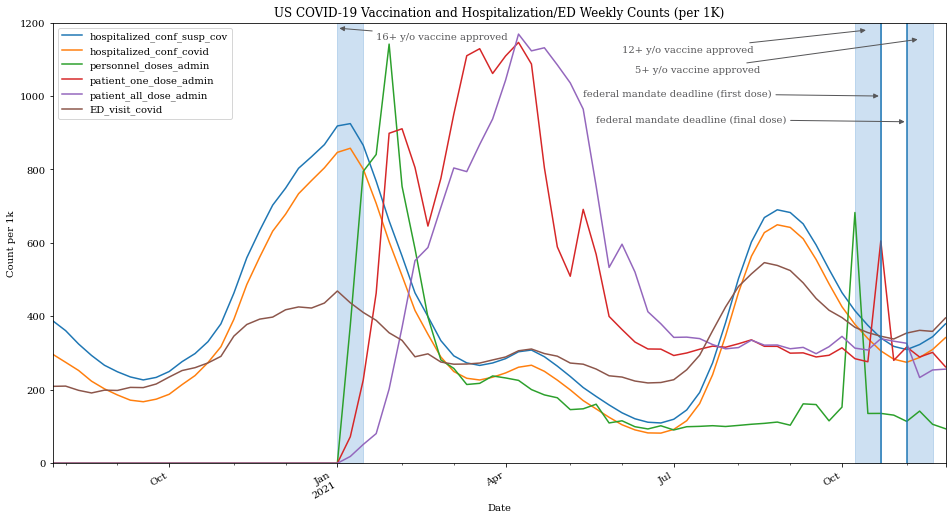

In [68]:
hosp_ed_one_all_by_collection_week_sum_1k = hosp_ed_one_all_clean_sum / 1000
cov_plot_1k(hosp_ed_one_all_by_collection_week_sum_1k)

### Figure 3.
### United States weekly total: adult hospitalization COVID-19 confirmed (blue) and confirmed/suspected (orange); Emergency Department visits related to COVID-19 (brown); hospital personnel vaccination doses (green); patient vaccination administrations first (red) and all (pink); COVID-19 vaccine approval timeframes (light blue) for 16+ years of age (left), 12+ years of age (center), and 5+ years of age (right); COVID-19 vaccination mandate deadline (vertical blue bar) for federal employees first dose (left) and final dose (right).

----

## Step 8 
> Visualize the mean values among fields in the categories: Hospital Strain & Vaccination Quantity.

In [69]:
hosp_ed_one_all_by_collection_week_sum_1k.columns[not_hosp_col_mask]

Index(['personnel_doses_admin', 'patient_one_dose_admin',
       'patient_all_dose_admin', 'ED_visit_covid'],
      dtype='object')

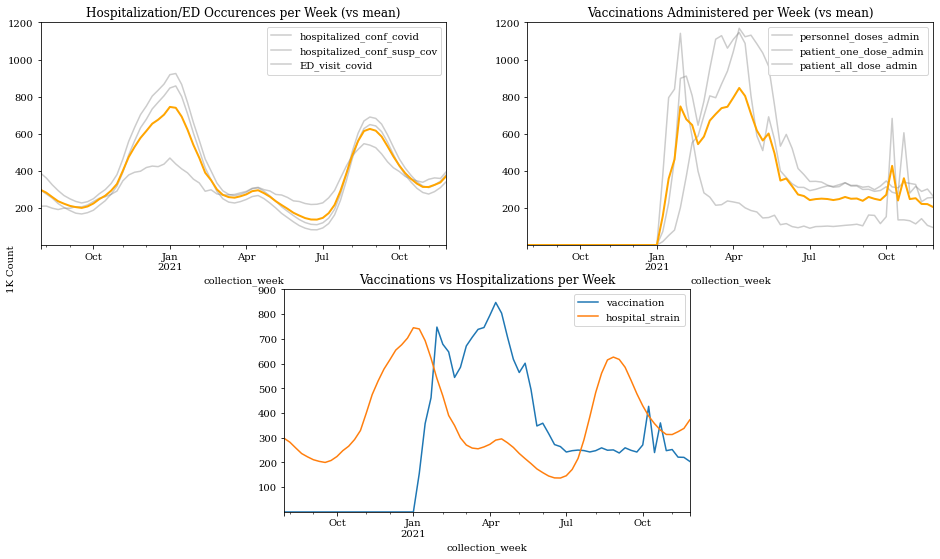

In [70]:
hosp_cols = ['hospitalized_conf_covid','hospitalized_conf_susp_cov','ED_visit_covid']
not_hosp_col_mask = ~hosp_ed_one_all_clean_df.columns.isin(hosp_cols)
vax_cols = hosp_ed_one_all_clean_df.columns[not_hosp_col_mask]

plt.rcParams["font.family"] = "serif"
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)

fig = plt.figure(figsize=(LARGE_FIGSIZE))
fig.text(0.1, 0.5, "1K Count", ha='center', va='center', rotation='vertical')

ax1 = fig.add_subplot(gs[0, :2], )
ax2 = fig.add_subplot(gs[0, 2:])
ax3 = fig.add_subplot(gs[1, 1:3])
ax1.set_ylim(1, 1200)
ax2.set_ylim(1, 1200)
ax3.set_ylim(1, 900)

# hospital strain fields
hosp_ed_one_all_by_collection_week_sum_1k[hosp_cols].plot(ax=ax1,
                                                           c='grey',
                                                           alpha=.4)
hosp_sum = hosp_ed_one_all_clean_gb.sum().loc[:,hosp_cols]
hosp_sum_mean_1k = (hosp_sum.iloc[:,0] + \
                    hosp_sum.iloc[:,1] + \
                    hosp_sum.iloc[:,2]
                   ) / len(hosp_cols) / 1000
hosp_sum_mean_1k.plot(ax=ax1,
                      c='orange',
                      linewidth=2)
ax1.title.set_text("Hospitalization/ED Occurences per Week (vs mean)")

# vaccination fields
hosp_ed_one_all_by_collection_week_sum_1k[vax_cols].plot(ax=ax2,
                                                         c='grey',
                                                         alpha=.4)
vax_sum = hosp_ed_one_all_clean_gb.sum().loc[:,vax_cols]
vax_sum_mean_1k = (vax_sum.iloc[:,0] + \
                    vax_sum.iloc[:,1] + \
                    vax_sum.iloc[:,2]
                   ) / len(vax_cols) / 1000
vax_sum_mean_1k.plot(ax=ax2, 
                     c='orange',
                     linewidth=2)
ax2.title.set_text("Vaccinations Administered per Week (vs mean)")

hospital_strain_vax_df = pd.DataFrame({'vaccination': vax_sum_mean_1k, 'hospital_strain': hosp_sum_mean_1k})
hospital_strain_vax_df.plot(ax=ax3)

ax3.title.set_text("Vaccinations vs Hospitalizations per Week")

### Figure 4.
### Mean of COVID-19 Hospital Strain fields (top left); Mean of COVID-19 Vaccination fields (top right); Mean of COVID-19 Hospital Strain & Vaccination fields (bottom).

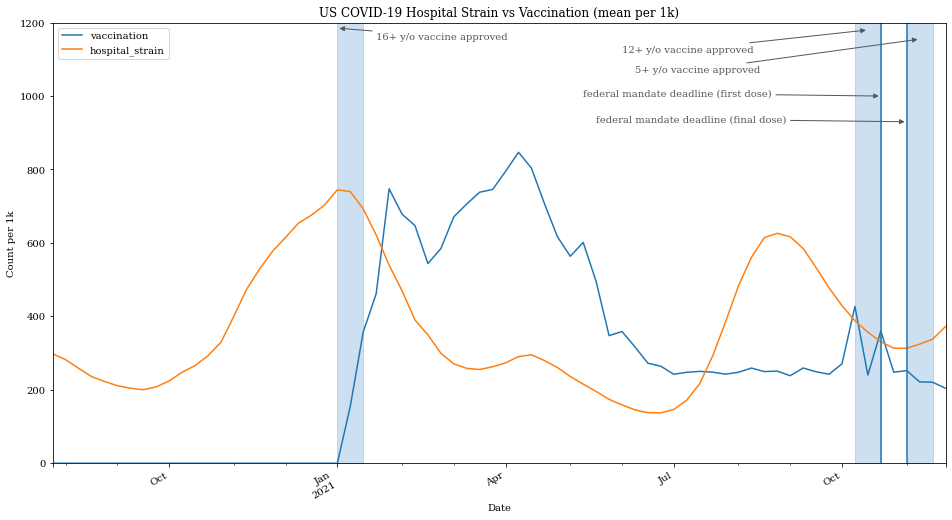

In [71]:
cov_plot_1k(hospital_strain_vax_df, "US COVID-19 Hospital Strain vs Vaccination (mean per 1k)")

### Figure 5.
### Mean COVID-19 Hospital Strain (orange) & Vaccination (blue); COVID-19 vaccine approval timeframes (light blue) for 16+ years of age (left), 12+ years of age (center), and 5+ years of age (right); COVID-19 vaccination mandate deadline (vertical blue bar) for federal employees first dose (left) and final dose (right).

----

## Step 9
> Statistically analyze fields for possible associations with fields in the converse category.

In [81]:
# get data starting where all fields have values (vaccines available)
hosp_vax_sum = hosp_ed_one_all_clean_sum[~(hosp_ed_one_all_clean_sum == 0).any(axis=1)]
personnel_doses_admin_sum = hosp_vax_sum.personnel_doses_admin
hospitalized_conf_susp_cov_sum = hosp_vax_sum.hospitalized_conf_susp_cov
hospitalized_conf_covid_sum = hosp_vax_sum.hospitalized_conf_covid
patient_one_dose_admin_sum = hosp_vax_sum.patient_one_dose_admin
patient_all_dose_admin_sum = hosp_vax_sum.patient_all_dose_admin
ED_visit_covid_sum = hosp_vax_sum.ED_visit_covid

----

### **Patient final vaccination:**

In [105]:
X2 = sm.add_constant(patient_all_dose_admin_sum)
est = sm.OLS(hospitalized_conf_susp_cov_sum, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     hospitalized_conf_susp_cov   R-squared:                       0.268
Model:                                    OLS   Adj. R-squared:                  0.252
Method:                         Least Squares   F-statistic:                     16.46
Date:                        Tue, 14 Dec 2021   Prob (F-statistic):           0.000195
Time:                                23:19:17   Log-Likelihood:                -634.14
No. Observations:                          47   AIC:                             1272.
Df Residuals:                              45   BIC:                             1276.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

**Table: Statistical summary in relation to hospitalizations COVID-19 confirmed/suspected**

In [104]:
X2 = sm.add_constant(patient_all_dose_admin_sum)
est = sm.OLS(hospitalized_conf_covid_sum, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     hospitalized_conf_covid   R-squared:                       0.277
Model:                                 OLS   Adj. R-squared:                  0.261
Method:                      Least Squares   F-statistic:                     17.27
Date:                     Tue, 14 Dec 2021   Prob (F-statistic):           0.000143
Time:                             23:19:15   Log-Likelihood:                -632.24
No. Observations:                       47   AIC:                             1268.
Df Residuals:                           45   BIC:                             1272.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

**Table: Statistical summary in relation to hospitalizations COVID-19 confirmed**

In [106]:
X2 = sm.add_constant(patient_all_dose_admin_sum)
est = sm.OLS(ED_visit_covid_sum, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         ED_visit_covid   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     16.01
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           0.000232
Time:                        23:19:18   Log-Likelihood:                -595.52
No. Observations:                  47   AIC:                             1195.
Df Residuals:                      45   BIC:                             1199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.17

**Table: Statistical summary in relation to  COVID-19 Emergency Department visits**

----------

### **Hospital personnel vaccination:**

In [82]:
X2 = sm.add_constant(personnel_doses_admin_sum)
est = sm.OLS(hospitalized_conf_susp_cov_sum, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     hospitalized_conf_susp_cov   R-squared:                       0.249
Model:                                    OLS   Adj. R-squared:                  0.233
Method:                         Least Squares   F-statistic:                     14.96
Date:                        Tue, 14 Dec 2021   Prob (F-statistic):           0.000352
Time:                                22:03:53   Log-Likelihood:                -634.73
No. Observations:                          47   AIC:                             1273.
Df Residuals:                              45   BIC:                             1277.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

**Table: Statistical summary in relation to hospitalizations COVID-19 confirmed/suspected**

In [93]:
X2 = sm.add_constant(personnel_doses_admin_sum)
est = sm.OLS(hospitalized_conf_covid_sum, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     hospitalized_conf_covid   R-squared:                       0.233
Model:                                 OLS   Adj. R-squared:                  0.216
Method:                      Least Squares   F-statistic:                     13.71
Date:                     Tue, 14 Dec 2021   Prob (F-statistic):           0.000581
Time:                             22:11:25   Log-Likelihood:                -633.62
No. Observations:                       47   AIC:                             1271.
Df Residuals:                           45   BIC:                             1275.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

**Table: Statistical summary in relation to hospitalizations COVID-19 confirmed**

In [94]:
X2 = sm.add_constant(personnel_doses_admin_sum)
est = sm.OLS(ED_visit_covid_sum, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         ED_visit_covid   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.05237
Date:                Tue, 14 Dec 2021   Prob (F-statistic):              0.820
Time:                        22:12:02   Log-Likelihood:                -602.65
No. Observations:                  47   AIC:                             1209.
Df Residuals:                      45   BIC:                             1213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.399e+

**Table: Statistical summary in relation to Emergency Department visits**

----------

# **Findings**

- Patient final vaccination counts may have a negative association with COVID-19 hospitalizations and Emergency department visits.
- Hospital personnel vaccination counts may have a positive association with COVID-19 hospitalizations.



# **Summary / Discussion**

Patient final vaccination counts appear, with moderate confidence, to be negatively associated with COVID-19 hospitalizations and Emergency department visits.

Hospital personnel vaccination counts appear to be positively associated with COVID-19 hospitalizations; however, this is not stated with confidence based upon this analysis.

## **Limitation**

Not having data on individuals proved to be limiting with regard to analysis. For example, an analysis of the rate of hospitalization among persons who are fully vaccinated in comparison to those who are unvaccinated or partially vaccinated becomes much less feasible with the subject dataset.

# **References**

1. Zeyaullah M., AlShahrani A.M., Muzammil K. COVID-19 and SARS-CoV-2 variants: current challenges and health concern. Front. Genet. 2021;12:693916. doi: 10.3389/fgene.2021.693916. https://search.proquest.com/docview/2548401488

2. Callaway E. Delta coronavirus variant: scientists brace for impact. Nature (London) 2021;595(7865):17–18. doi: 10.1038/d41586-021-01696-3.

3. Moghadas, S. M., Vilches, T. N., Zhang, K., Wells, C. R., Shoukat, A., Singer, B. H., Meyers, L. A., Neuzil, K. M., Langley, J. M., Fitzpatrick, M. C., & Galvani, A. P. (2021). The impact of vaccination on COVID-19 outbreaks in the United States. medRxiv : the preprint server for health sciences, 2020.11.27.20240051. https://doi.org/10.1101/2020.11.27.20240051

4. Moline, H. L., Whitaker, M., Deng, L., Rhodes, J. C., Milucky, J., Pham, H., Patel, K., Anglin, O., Reingold, A., Chai, S. J., Alden, N. B., Kawasaki, B., Meek, J., Yousey-Hindes, K., Anderson, E. J., Farley, M. M., Ryan, P. A., Kim, S., Nunez, V. T., … Havers, F. P. (2021). Effectiveness of COVID-19 Vaccines in Preventing Hospitalization Among Adults Aged ≥65 Years — COVID-NET, 13 States, February–April 2021. MMWR. Morbidity and Mortality Weekly Report, 70(32), 1088–1093. https://doi.org/10.15585/mmwr.mm7032e3

5. Genomic epidemiology of novel coronavirus - Global subsampling. (2012). NextStrain. https://nextstrain.org/ncov/gisaid/global

6. Sakay, Y. N. (2012). Here's How Well COVID-19 Vaccines Work Against the Delta Variant. Healthline. https://www.healthline.com/health-news/heres-how-well-covid-19-vaccines-work-against-the-delta-variant